# Implementing Logistic Regression on two different datasets

## 2 - Logistic Regression
We will build a logistic regression model to predict whether a student gets admitted into a university.

### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

%matplotlib inline

In [134]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [137]:
X_train,y_train=load_data("ex2data1.txt")
print(X_train.shape,y_train.shape)

(100, 2) (100,)


In [140]:
#defining our plot function to visualise our data
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

    # Set the y-axis label
    plt.ylabel('Exam 2 score') 
    # Set the x-axis label
    plt.xlabel('Exam 1 score') 
    plt.legend(loc="upper right")
    plt.show()


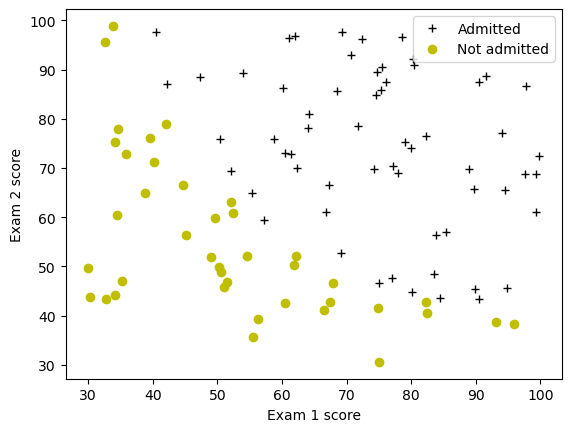

In [141]:
# now plotting our data
plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not admitted")

The goal is to build a logistic regression model to fit this data.
- With this model, we can then predict if a new student will be admitted based on their scores on the two exams.

In [142]:
#defining our sigmoid function
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [145]:
#deining the cost function
def compute_cost(X,y,w,b,lambda_=1):
    m,n=X.shape
    cost=0
    for i in range(m):
        z=np.dot(X[i],w)+b
        g=sigmoid(z)
        cost+=-y[i]*np.log(g)-(1-y[i])*np.log(1-g)
    total_cost=cost/m
    return total_cost
    

In [146]:
m, n = X_train.shape
print(X_train.shape)
# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
print(initial_w.shape)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

(100, 2)
(2,)
Cost at initial w (zeros): 0.693


In [150]:
#defining our gradient function
def compute_gradient(X,y,w,b,lambda_=None):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i] 
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m  
    return dj_db,dj_dw

In [152]:
# the gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [153]:
#learning parameters using gradient descent
def gradient_descent(X,y,w_in,b_in,cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    for i in range(num_iters):
 # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db  
 # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [154]:
#Now we run the gradient descent algorithm above to learn the parameters for our dataset
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


# Evaluating our models quality
We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 


In [182]:
def predict(X,w,b):
    m,n=X.shape
    p=np.zeros(m)
    for i in range(m):
        z_wb = np.dot(X[i],w) +b
        f_wb=sigmoid(z_wb)
        p[i]=1 if f_wb>0.5 else 0
        
    return p
        
    

In [187]:
p=predict(X_train,w,b)
print(p)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]


In [188]:
#Computing accuracy on our training set
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
